ERAv2 Session10- Custom ResNet on CIFAR10 - Shailen Kumar Dalbehera

In [ ]:
!git clone https://github.com/shylane/ERAv2.git

In [7]:
from s10_custom_resnet_cifar10.utils import train_data, test_data, find_lr
from s10_custom_resnet_cifar10.model import CustomResNet
from s10_custom_resnet_cifar10.train import train_custom_resnet
from torch.utils.data import DataLoader
import torch


CUDA & SEED

In [3]:
SEED = 42

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


Load data using functions in utils and parameters including batch size of 512

In [4]:
# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=512, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

test_loader = DataLoader(test_data(), **dataloader_args)
train_loader = DataLoader(train_data(), **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


Visualizing training data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


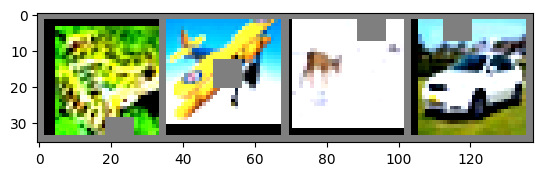

frog  plane deer  car  


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import torchvision
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Find LR (Leslie N. Smith approach)

In [8]:
model = CustomResNet().to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

find_lr(model = model,
        optimizer = optimizer,
        criterion = criterion,
        train_loader=train_loader,
        test_loader=test_loader,
        device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

: 

In [ ]:
lr_max=1.83e-02
# Train the custom ResNet model
train_custom_resnet(
    model = model,
    optimizer = optimizer,
    criterion = criterion,
    train_loader=train_loader,
    test_loader=test_loader,
    num_epochs=24,
    max_at_epoch=5,
    # lr_min=1e-4,
    lr_max=lr_max,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         PrepLayer-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,856
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,584
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,584
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

  0%|          | 0/100 [00:00<?, ?it/s]

: 

CODE BLOCK: 7

In [ ]:
model = CustomResNet().to(device)
summary(model, input_size=(3, 32, 32))

CODE BLOCK: 8

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

# test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9
This block is now shifted to utils.py file and functions in next block call functions train and test from there.

CODE BLOCK: 10

In [ ]:
model = Net().to(device)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer(model), criterion(), train_losses, train_acc)
  test_acc, test_losses = test(model, device, test_loader, criterion(), test_losses, test_acc)
  scheduler(model).step()

CODE BLOCK: 11

In [ ]:
# Plot the training and test accuracy and loss
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

summary(model, input_size=(1, 28, 28))